# Rooftop Classfiication NN 
## Exploratory Data Analysis 


This EDA was primarily based off the work of Ben Kamphaus from Kaggle. Thank you, Ben! 
https://www.kaggle.com/bkamphaus/exploratory-image-analysis

In [1]:
import numpy as np
import pandas as pd
import glob 
import cv2
import matplotlib.pyplot as plt
%matplotlib inline


Converted all JP2s to JPGs with XnConvert for Linux.

In [2]:
jpegs = [f for f in glob.glob("JP2/*.jpg")]
print(jpegs[:9])

['JP2/Denver_image_2015.jpg', 'JP2/Denver_image_1973.jpg', 'JP2/Denver_image_981.jpg', 'JP2/Denver_image_2220.jpg', 'JP2/Denver_image_897.jpg', 'JP2/Denver_image_1483.jpg', 'JP2/Denver_image_5.jpg', 'JP2/Denver_image_1010.jpg', 'JP2/Denver_image_1700.jpg']


Let's take a peak at the very first image in the dataset.

In [3]:
firstimg = plt.imread("JP2/Denver_image_1.jpg")


The image has 2,640 rows and columns and three channels (RGB).

In [4]:
dims = np.shape(firstimg)
print (dims)

(2640, 2640, 3)


We can print out the values in the image and get back what we expect. The max value in an RGB image is 255 (and a min of 0).

In [5]:
np.min(firstimg), np.max(firstimg)


(0, 255)

We need to create a matric of the pixels by color channels. The output is an array with each pixel's RGB values (for example, 122, 121, 127... we have a lot of grey in our image).

In [6]:
pixel_matrix = np.reshape(firstimg, (dims[0] * dims[1], dims[2]))
print(np.shape(pixel_matrix))


(6969600, 3)


In [7]:
pixel_matrix

array([[122, 121, 127],
       [121, 120, 126],
       [124, 123, 129],
       ...,
       [157, 155, 156],
       [157, 155, 156],
       [157, 155, 156]], dtype=uint8)

We can plot the channels against each other and look for any kinda of correlation. Below I plot the first chanel (0) against the third channel (2). The histogram shows that there are a lot of pixels have an equal value of R and B (grey).

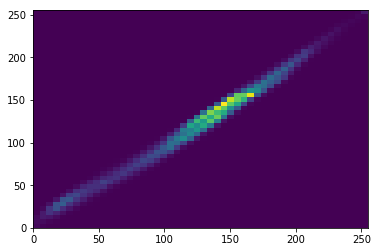

In [8]:
_ = plt.hist2d(pixel_matrix[:,1], pixel_matrix[:,2], bins=(50,50))


Let's take a look at another image. The fifth on in this case.

In [9]:
fifth = plt.imread('JP2/Denver_image_5.jpg')
dims = np.shape(fifth)
pixel_matrix5 = np.reshape(fifth, (dims[0] * dims[1], dims[2]))


This histogram shows a lesser range of color in the image, but the image is still primarily grey.

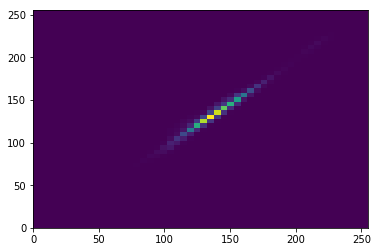

In [10]:
_ = plt.hist2d(pixel_matrix5[:,1], pixel_matrix5[:,2], bins=(50,50))


We can compare channels (in this case, the third channel) between the two images. The histogram below shows that the most common shared values lie in the middle... again, grey.

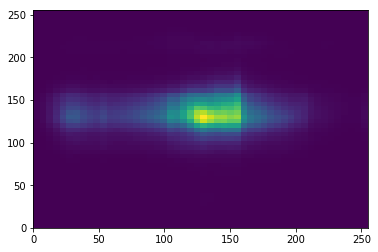

In [11]:
_ = plt.hist2d(pixel_matrix[:,2], pixel_matrix5[:,2], bins=(50,50))

So what do these images look like, anyway?

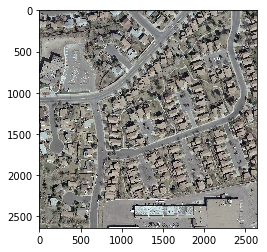

In [12]:
plt.imshow(firstimg)


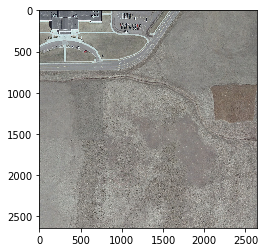

In [13]:
plt.imshow(fifth)


Let's look at the pixel distributions across three channels (

Yup, those certainly are some grey images.

## K-Mean Clustering
We can experiment with compressing an image by applying a quick k-means clustering on the image with a k of 5. This gives us an impression of what kinds of features we might be able to extract from the image set.  

From the result below, we see a dark purple for the roads, yellow for the green spaces, and blues and greens for the built environment.

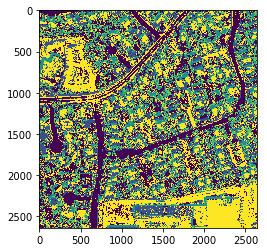

In [14]:
# simple k means clustering
from sklearn import cluster

kmeans = cluster.KMeans(5)
clustered = kmeans.fit_predict(pixel_matrix)

dims = np.shape(firstimg)
clustered_img = np.reshape(clustered, (dims[0], dims[1]))
plt.imshow(clustered_img)

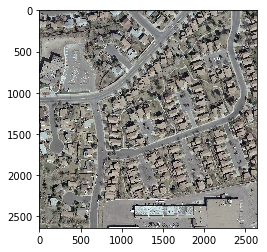

In [15]:
plt.imshow(firstimg)


We can plot the histogram of the color values for each channel in the image. All three channels seem to correlate strongly with each other, indicating a lot of grey values.

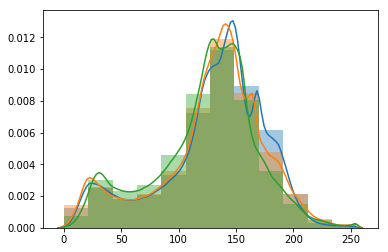

In [16]:
# quick look at color value histograms for pixel matrix from first image
import seaborn as sns
sns.distplot(pixel_matrix[:,0], bins=12)
sns.distplot(pixel_matrix[:,1], bins=12)
sns.distplot(pixel_matrix[:,2], bins=12)


## Lightweight wrapper for handling image matrix transformations

In [17]:
class MSImage():
    """Lightweight wrapper for handling image to matrix transforms. No setters,
    main point of class is to remember image dimensions despite transforms."""
    
    def __init__(self, img):
        """Assume color channel interleave that holds true for this set."""
        self.img = img
        self.dims = np.shape(img)
        self.mat = np.reshape(img, (self.dims[0] * self.dims[1], self.dims[2]))

    @property
    def matrix(self):
        return self.mat
        
    @property
    def image(self):
        return self.img
    
    def to_flat_img(self, derived):
        """"Use dims property to reshape a derived matrix back into image form when
        derived image would only have one band."""
        return np.reshape(derived, (self.dims[0], self.dims[1]))
    
    def to_matched_img(self, derived):
        """"Use dims property to reshape a derived matrix back into image form."""
        return np.reshape(derived, (self.dims[0], self.dims[1], self.dims[2]))

In [18]:
msi_first = MSImage(firstimg)
print(np.shape(msi_first.matrix))
print(np.shape(msi_first.img))


(6969600, 3)
(2640, 2640, 3)


## Sobel Edge Detection
A Sobel filter is one means of getting a basic edge magnitude/gradient image. 



In [19]:
import skimage
from skimage.feature import greycomatrix, greycoprops
from skimage.filters import sobel


In [20]:
msi_image = [MSImage(plt.imread(firstimg))]


TypeError: Object does not appear to be a 8-bit string path or a Python file-like object

In [ ]:
fig = plt.figure(figsize=(8, 8))
plt.imshow(sobel(jpegs[0].image[:750,:750,2]))
